# Lecture 2: Playing with Social Media Data using Pandas DataFrames

This chapter is a rehash of Chapter 3 ["Data Manipulation with Pandas"](https://jakevdp.github.io/PythonDataScienceHandbook/03.00-introduction-to-pandas.html) (Jake Vander Plas, ["Python Data Science Handbook"](https://jakevdp.github.io/PythonDataScienceHandbook/)).

## 0. Looking Back

- The previous Notebook covered in-built data types in Python (strings, integers and floats)
- And introduced strings as object to which specific methods were attached

#### --Exercise--

- create a variable `x`;
- assign a string value to this variable;
- print the type of variable;
- print the content of the variable

In [4]:
# insert code here
x = 'Hello Yifan'
print (type(x))
print (x)

<class 'str'>
Hello Yifan


## 1. Why Pandas?
### Working with (semi)structured data

The data types and functions covered in the previous Notebook belong to the standard Python library. It is the backbone of the Python language, but the operations they perform (and the structures they represent) remain rather basic. As writing code to handle more complex application would be laborious, Python comes with various libraries that offer myriad data science tools. 

Below, I give the example of opening CSV files with Pandas (the Python data science library we will be using in this course).

### 1.1. CSV files

CSV stands for "Comma Separated Values": a data format in which the cells are separated by commas.

For example, the CSV table below has **columns** A,B,C and **rows** 1 to 3:

``
,A,B,C
1,0,1,1
2,1,0,1
3,1,1,1
``

The CSV above is an example of **structured** data: each element is properly identified by the **header** (columns) and the **index** (rows).

We can represent the CSV file as a Python string. The newlines are represented in Python by the '\n' character. The cell below creates a CSV table and prints it. ! first string is ','; '\n' as one character 

In [5]:
csv_string = ',A,B,C\n1,0,2,5\n2,8,3,1\n3,2,9,1'
print(csv_string)

,A,B,C
1,0,2,5
2,8,3,1
3,2,9,1


Using index notation (remember the square brackets?) we can select certain elements, both single characters and slices.

In [19]:
print(csv_string[11]) # print character at index 11
print(csv_string[11:14]) # print slice starting at character with index 11 up to index 14

2
2,5


Index notation is handy, but the structure of the CSV file remains implicit--i.e. we can not ask Python to give us the integer in column B at row 2. To recognize the structure properly, Python needs to **parse** the document. While this can be done with standard Python tools, there are external libraries that help you with handling structured data.

In the course, we rely on Pandas, Python's main data science library. Before we can use Pandas, we have to load it using the import statement (which means as much as "please load all tools hidden in de Pandas folder").

In [20]:
import pandas # this imports pandas tools

After importing the Pandas tools we can use the `read_csv` function to read the data.

In [21]:
from io import StringIO # Ignore this line, this technicality is not important for this course
df = pandas.read_csv(StringIO(csv_string),index_col=0) # transform the CSV file as a Pandas DataFrame
df

,A,B,C
1,0,2,5
2,8,3,1
3,2,9,1


### Exercise

What is the data type of the `df` variable?

In [22]:
# Insert code here
type (df)

pandas.core.frame.DataFrame

### --Important!--

Please note the following:
- The syntax for using tools from external libraries adheres to the following structure:
        `<library>.<function>(<arguments>)`
- As you noticed, the CSV file is not a string object but belongs to the DataFrame class (which we will inspect below)

Because Pandas identifies the rows and columns automatically, we can ask more meaningful and elaborate questions to extract specific cells or other elements from the DataFrame.

#### Exercise: 

To access specific areas in our DataFrame, we need to use the **`.loc[:,:]`** indexer. The syntax, here, is similar to the index notation we studied previously but applies to two dimensions (rows *and* columns) instead to just one. These dimensions are separated by a comma. While index notation allowed you to retrieve an item from a sequence by location, `.loc[]` is more flexible: you can simultaneously define the row and columns you'd like to access. To understand how this works guess which part of the table the statements below will print. 

#### Retrieving one cell

In [23]:
print(df.loc[2,'A'])

8


In [24]:
print(df.loc[1,'B'])

2


#### --Exercise--

Print the integer in row 3 and column C.

In [25]:
# insert code here
print(df.loc[3,'C'])

1


Multiply the integer in row 3 and column C with the integer in row 1 and column B.

In [26]:
# insert code here
print(df.loc[3,'C'], df.loc[1,'B'])

1 2


#### Retrieving slices

In [27]:
print(df.loc[2,:])

A    8
B    3
C    1
Name: 2, dtype: int64


In [28]:
print(df.loc[:,'A'])

1    0
2    8
3    2
Name: A, dtype: int64


It is also possible to obtain multiple columns. Note that the column names are then enclosed within square brackets.

In [29]:
print(df.loc[:,['A','B']])

   A  B
1  0  2
2  8  3
3  2  9


Print the integers with index 1 to 2 in columns A and C.

In [30]:
# insert code here
print(df.loc[1:2,['A','C']])

   A  C
1  0  5
2  8  1


We can also print all columns for a specific row:

In [31]:
print(df.loc[1,:])

A    0
B    2
C    5
Name: 1, dtype: int64


By now it should be clear that Pandas' `.read_csv()` facilitates the exploration of structured data (compared to strings in combination with index notation that are part of the Python standard library).

For sure this a toy example, the power of these tools will become clear when working with real data.

## 2. Reading YouTube and Facebook data with Pandas

In this course, we focus on YouTube and Facebook data obtained via [DMI](https://tools.digitalmethods.net) tools.

For YouTube, we use [this collection of tools](https://tools.digitalmethods.net/netvizz/youtube/). For Facebook, we rely on [Netvizz](https://apps.facebook.com/107036545989762/). We inspect both tools later in more detail. 

To demonstrate the Pandas functionalities, we will work with comments from [this](https://www.youtube.com/watch?v=-OLEyOYC6P4) documentary on techno music.

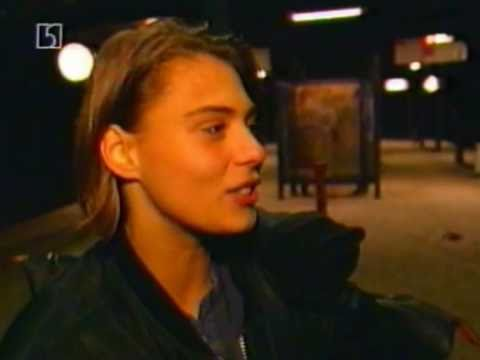

In [32]:
# Run this cell to watch the YouTube clip.
from IPython.display import YouTubeVideo
YouTubeVideo('-OLEyOYC6P4')

All the comments on this video are saved as TSV (Tab Separated Values) file and stored [here](https://github.com/kasparvonbeelen/CTH2019/blob/master/data/videoinfo_-OLEyOYC6P4_2018_12_18-09_26_24_comments.tab). 

In Python, tab spaces are represented as `\t`. Compare the print statements below to see the difference.

In [38]:
print("Kaspar Beelen")
print("Kaspar\tBeelen")
print("Kaspar\t\tBeelen")    

Kaspar Beelen
Kaspar	Beelen
Kaspar		Beelen


Below we store the URL (that will bring you to the raw data) in the `file_url` variable.

In [39]:
file_url = 'https://raw.githubusercontent.com/kasparvonbeelen/CTH2019/master/data/page_5281959998_2018_12_28_22_00_39_fullstats.tab' 

For convenience, we will use an abbreviation to refer to the Pandas library. We use `pd` to refer to the pandas library, this will save us some typing work.

The code below imports Pandas use `pd` an abbreviation.

In [40]:
import pandas as pd

Pandas is smart enough to automatically download information from the Web. We just have to pass it a URL. Secondly, we define the delimiter (a character which separates the individual values) with the `sep=` argument.

In [41]:
df = pd.read_csv(file_url, sep='\t')

With these few lines, you managed to lead the whole corpus of comments into your notebook.

The `.head()` method allows you to inspect the table.

In [42]:
df.head(3)

,type,by,post_id,post_link,post_message,picture,full_picture,link,link_domain,post_published,...,comments_retrieved,comments_base,comments_replies,comment_likes_count,rea_LOVE,rea_WOW,rea_HAHA,rea_SAD,rea_ANGRY,rea_THANKFUL
0,link,post_page_5281959998,5281959998_10151785869499999,https://www.facebook.com/5281959998/posts/1015...,Facebook keeps its rulebooks and their existen...,https://external.xx.fbcdn.net/safe_image.php?d...,https://external.xx.fbcdn.net/safe_image.php?d...,https://www.nytimes.com/2018/12/27/world/faceb...,nytimes.com,2018-12-28T20:55:00+0000,...,2,2,0,1,1,1,0,0,0,0
1,link,post_page_5281959998,5281959998_10151785978419999,https://www.facebook.com/5281959998/posts/1015...,In 1972 Jerry Lewis best known for mainstrea...,https://external.xx.fbcdn.net/safe_image.php?d...,https://external.xx.fbcdn.net/safe_image.php?d...,https://www.nytimes.com/2018/12/28/movies/jerr...,nytimes.com,2018-12-28T20:25:00+0000,...,14,11,3,6,1,21,0,14,0,0
2,link,post_page_5281959998,5281959998_10151785960009999,https://www.facebook.com/5281959998/posts/1015...,The last issue of the New York Times Magazine ...,https://external.xx.fbcdn.net/safe_image.php?d...,https://external.xx.fbcdn.net/safe_image.php?d...,https://www.nytimes.com/interactive/2018/12/27...,nytimes.com,2018-12-28T19:55:00+0000,...,2,2,0,0,15,0,0,1,0,0


**Exercise**: print the first 10 rows

In [46]:
# insert code here
df.head(10)

,type,by,post_id,post_link,post_message,picture,full_picture,link,link_domain,post_published,...,comments_retrieved,comments_base,comments_replies,comment_likes_count,rea_LOVE,rea_WOW,rea_HAHA,rea_SAD,rea_ANGRY,rea_THANKFUL
0,link,post_page_5281959998,5281959998_10151785869499999,https://www.facebook.com/5281959998/posts/1015...,Facebook keeps its rulebooks and their existen...,https://external.xx.fbcdn.net/safe_image.php?d...,https://external.xx.fbcdn.net/safe_image.php?d...,https://www.nytimes.com/2018/12/27/world/faceb...,nytimes.com,2018-12-28T20:55:00+0000,...,2,2,0,1,1,1,0,0,0,0
1,link,post_page_5281959998,5281959998_10151785978419999,https://www.facebook.com/5281959998/posts/1015...,In 1972 Jerry Lewis best known for mainstrea...,https://external.xx.fbcdn.net/safe_image.php?d...,https://external.xx.fbcdn.net/safe_image.php?d...,https://www.nytimes.com/2018/12/28/movies/jerr...,nytimes.com,2018-12-28T20:25:00+0000,...,14,11,3,6,1,21,0,14,0,0
2,link,post_page_5281959998,5281959998_10151785960009999,https://www.facebook.com/5281959998/posts/1015...,The last issue of the New York Times Magazine ...,https://external.xx.fbcdn.net/safe_image.php?d...,https://external.xx.fbcdn.net/safe_image.php?d...,https://www.nytimes.com/interactive/2018/12/27...,nytimes.com,2018-12-28T19:55:00+0000,...,2,2,0,0,15,0,0,1,0,0
3,link,post_page_5281959998,5281959998_10151785890624999,https://www.facebook.com/5281959998/posts/1015...,Trump s trip to Iraq was supposed to be a secr...,https://external.xx.fbcdn.net/safe_image.php?d...,https://external.xx.fbcdn.net/safe_image.php?d...,https://www.nytimes.com/2018/12/28/world/europ...,nytimes.com,2018-12-28T19:25:00+0000,...,137,59,78,457,7,74,321,4,4,0
4,link,post_page_5281959998,5281959998_10151785952269999,https://www.facebook.com/5281959998/posts/1015...,So why did an explosion turn New York City s n...,https://external.xx.fbcdn.net/safe_image.php?d...,https://external.xx.fbcdn.net/safe_image.php?d...,https://www.nytimes.com/2018/12/28/nyregion/tr...,nytimes.com,2018-12-28T19:25:00+0000,...,101,82,19,114,10,53,49,1,1,0
5,status,post_page_5281959998,5281959998_10151785934179999,https://www.facebook.com/5281959998/posts/1015...,The Banks children go on an adventure that tak...,NaN,NaN,NaN,NaN,2018-12-28T19:10:17+0000,...,3,3,0,0,0,0,0,0,0,0
6,link,post_page_5281959998,5281959998_10151785810489999,https://www.facebook.com/5281959998/posts/1015...,It feels like family. Across the United Stat...,https://external.xx.fbcdn.net/safe_image.php?d...,https://external.xx.fbcdn.net/safe_image.php?d...,https://www.nytimes.com/2018/12/28/business/se...,nytimes.com,2018-12-28T18:55:00+0000,...,26,22,4,42,13,0,1,49,2,0
7,link,post_page_5281959998,5281959998_10151785897894999,https://www.facebook.com/5281959998/posts/1015...,Were you a regular at Output? We want to hear ...,https://external.xx.fbcdn.net/safe_image.php?d...,https://external.xx.fbcdn.net/safe_image.php?d...,https://www.nytimes.com/2018/12/27/nyregion/ou...,nytimes.com,2018-12-28T18:35:00+0000,...,19,13,6,5,0,2,0,10,0,0
8,link,post_page_5281959998,5281959998_10151785858099999,https://www.facebook.com/5281959998/posts/1015...,More than 2 600 migrant children were separate...,https://external.xx.fbcdn.net/safe_image.php?d...,https://external.xx.fbcdn.net/safe_image.php?d...,https://www.nytimes.com/interactive/2018/12/27...,nytimes.com,2018-12-28T18:25:00+0000,...,158,29,129,148,4,4,3,120,26,0
9,link,post_page_5281959998,5281959998_10151785815164999,https://www.facebook.com/5281959998/posts/1015...,More than a week after somebody (or somebodies...,https://external.xx.fbcdn.net/safe_image.php?d...,https://external.xx.fbcdn.net/safe_image.php?d...,https://www.nytimes.com/2018/12/27/world/europ...,nytimes.com,2018-12-28T18:10:00+0000,...,18,12,6,7,1,5,5,6,2,0


**Question**: What information does `df` contain?

`data.tail()` prints the last rows

In [44]:
df.tail()


,type,by,post_id,post_link,post_message,picture,full_picture,link,link_domain,post_published,...,comments_retrieved,comments_base,comments_replies,comment_likes_count,rea_LOVE,rea_WOW,rea_HAHA,rea_SAD,rea_ANGRY,rea_THANKFUL
45,link,post_page_5281959998,5281959998_10151785102649999,https://www.facebook.com/5281959998/posts/1015...,Coconut milk gives this slow-cooker butter chi...,https://external.xx.fbcdn.net/safe_image.php?d...,https://external.xx.fbcdn.net/safe_image.php?d...,https://cooking.nytimes.com/recipes/1018803-sl...,cooking.nytimes.com,2018-12-28T00:55:00+0000,...,129,84,45,79,64,18,1,0,0,0
46,link,post_page_5281959998,5281959998_10151785015314999,https://www.facebook.com/5281959998/posts/1015...,The Trump administration and Republicans in Co...,https://external.xx.fbcdn.net/safe_image.php?d...,https://external.xx.fbcdn.net/safe_image.php?d...,https://www.nytimes.com/interactive/2017/10/05...,nytimes.com,2018-12-28T00:25:00+0000,...,791,554,237,3697,30,211,14,2020,10011,0
47,link,post_page_5281959998,5281959998_10151785043384999,https://www.facebook.com/5281959998/posts/1015...,The internet can be shall we say a lot. But ...,https://external.xx.fbcdn.net/safe_image.php?d...,https://external.xx.fbcdn.net/safe_image.php?d...,https://www.nytimes.com/2018/12/27/style/best-...,nytimes.com,2018-12-27T23:55:00+0000,...,14,12,2,4,10,0,23,1,0,0
48,link,post_page_5281959998,5281959998_10151785251369999,https://www.facebook.com/5281959998/posts/1015...,News analysis: With his abrupt order to withdr...,https://external.xx.fbcdn.net/safe_image.php?d...,https://external.xx.fbcdn.net/safe_image.php?d...,https://www.nytimes.com/2018/12/27/us/politics...,nytimes.com,2018-12-27T23:25:00+0000,...,741,421,320,2077,31,167,826,22,65,0
49,link,post_page_5281959998,5281959998_10151785245419999,https://www.facebook.com/5281959998/posts/1015...,Republican leaders gave up hope on Thursday of...,https://external.xx.fbcdn.net/safe_image.php?d...,https://external.xx.fbcdn.net/safe_image.php?d...,https://www.nytimes.com/2018/12/27/us/politics...,nytimes.com,2018-12-27T22:55:00+0000,...,735,403,332,6327,30,88,226,88,625,0


To determine the dimensions of the dataframe--the number of rows and columns--use `.shape` attribute.
> IMPORTANT: As opposed to methods, attributes do not end with parantheses. If methods can be understood as the verbs of the Python language, the attributes are the adjectives, they tell you something about the object they are attached to but do not modify it.

In [47]:
df.shape 

(50, 27)

#### \*\*\*Exercise

Now, let's look at some Facebook data: 50 post retrieved from the New York Times' Facebook page.

- Load the data you find [here](https://raw.githubusercontent.com/kasparvonbeelen/CTH2019/master/data/videoinfo_-OLEyOYC6P4_2018_12_18-09_26_24_comments.tab) in Pandas dataframe. Assign it to a variable with name `df`.
> HINT: As in the example above, simply use the URL to retrieve the data. 

In [50]:
# insert code here
import pandas as pd
url = "https://raw.githubusercontent.com/kasparvonbeelen/CTH2019/master/data/page_5281959998_2018_12_28_22_00_39_fullstats.tab"
df = pd.read_csv(url, sep='\t')


What are the dimensions of the DataFrame?

In [51]:
# insert code here
df.shape

(50, 27)

Print the column names using the `.columns` attribute.

In [52]:
# insert code here
df.head()

,type,by,post_id,post_link,post_message,picture,full_picture,link,link_domain,post_published,...,comments_retrieved,comments_base,comments_replies,comment_likes_count,rea_LOVE,rea_WOW,rea_HAHA,rea_SAD,rea_ANGRY,rea_THANKFUL
0,link,post_page_5281959998,5281959998_10151785869499999,https://www.facebook.com/5281959998/posts/1015...,Facebook keeps its rulebooks and their existen...,https://external.xx.fbcdn.net/safe_image.php?d...,https://external.xx.fbcdn.net/safe_image.php?d...,https://www.nytimes.com/2018/12/27/world/faceb...,nytimes.com,2018-12-28T20:55:00+0000,...,2,2,0,1,1,1,0,0,0,0
1,link,post_page_5281959998,5281959998_10151785978419999,https://www.facebook.com/5281959998/posts/1015...,In 1972 Jerry Lewis best known for mainstrea...,https://external.xx.fbcdn.net/safe_image.php?d...,https://external.xx.fbcdn.net/safe_image.php?d...,https://www.nytimes.com/2018/12/28/movies/jerr...,nytimes.com,2018-12-28T20:25:00+0000,...,14,11,3,6,1,21,0,14,0,0
2,link,post_page_5281959998,5281959998_10151785960009999,https://www.facebook.com/5281959998/posts/1015...,The last issue of the New York Times Magazine ...,https://external.xx.fbcdn.net/safe_image.php?d...,https://external.xx.fbcdn.net/safe_image.php?d...,https://www.nytimes.com/interactive/2018/12/27...,nytimes.com,2018-12-28T19:55:00+0000,...,2,2,0,0,15,0,0,1,0,0
3,link,post_page_5281959998,5281959998_10151785890624999,https://www.facebook.com/5281959998/posts/1015...,Trump s trip to Iraq was supposed to be a secr...,https://external.xx.fbcdn.net/safe_image.php?d...,https://external.xx.fbcdn.net/safe_image.php?d...,https://www.nytimes.com/2018/12/28/world/europ...,nytimes.com,2018-12-28T19:25:00+0000,...,137,59,78,457,7,74,321,4,4,0
4,link,post_page_5281959998,5281959998_10151785952269999,https://www.facebook.com/5281959998/posts/1015...,So why did an explosion turn New York City s n...,https://external.xx.fbcdn.net/safe_image.php?d...,https://external.xx.fbcdn.net/safe_image.php?d...,https://www.nytimes.com/2018/12/28/nyregion/tr...,nytimes.com,2018-12-28T19:25:00+0000,...,101,82,19,114,10,53,49,1,1,0


Show the first ten rows (using `.loc[]`).

In [55]:
# insert code here
df.loc[0:9]

,type,by,post_id,post_link,post_message,picture,full_picture,link,link_domain,post_published,...,comments_retrieved,comments_base,comments_replies,comment_likes_count,rea_LOVE,rea_WOW,rea_HAHA,rea_SAD,rea_ANGRY,rea_THANKFUL
0,link,post_page_5281959998,5281959998_10151785869499999,https://www.facebook.com/5281959998/posts/1015...,Facebook keeps its rulebooks and their existen...,https://external.xx.fbcdn.net/safe_image.php?d...,https://external.xx.fbcdn.net/safe_image.php?d...,https://www.nytimes.com/2018/12/27/world/faceb...,nytimes.com,2018-12-28T20:55:00+0000,...,2,2,0,1,1,1,0,0,0,0
1,link,post_page_5281959998,5281959998_10151785978419999,https://www.facebook.com/5281959998/posts/1015...,In 1972 Jerry Lewis best known for mainstrea...,https://external.xx.fbcdn.net/safe_image.php?d...,https://external.xx.fbcdn.net/safe_image.php?d...,https://www.nytimes.com/2018/12/28/movies/jerr...,nytimes.com,2018-12-28T20:25:00+0000,...,14,11,3,6,1,21,0,14,0,0
2,link,post_page_5281959998,5281959998_10151785960009999,https://www.facebook.com/5281959998/posts/1015...,The last issue of the New York Times Magazine ...,https://external.xx.fbcdn.net/safe_image.php?d...,https://external.xx.fbcdn.net/safe_image.php?d...,https://www.nytimes.com/interactive/2018/12/27...,nytimes.com,2018-12-28T19:55:00+0000,...,2,2,0,0,15,0,0,1,0,0
3,link,post_page_5281959998,5281959998_10151785890624999,https://www.facebook.com/5281959998/posts/1015...,Trump s trip to Iraq was supposed to be a secr...,https://external.xx.fbcdn.net/safe_image.php?d...,https://external.xx.fbcdn.net/safe_image.php?d...,https://www.nytimes.com/2018/12/28/world/europ...,nytimes.com,2018-12-28T19:25:00+0000,...,137,59,78,457,7,74,321,4,4,0
4,link,post_page_5281959998,5281959998_10151785952269999,https://www.facebook.com/5281959998/posts/1015...,So why did an explosion turn New York City s n...,https://external.xx.fbcdn.net/safe_image.php?d...,https://external.xx.fbcdn.net/safe_image.php?d...,https://www.nytimes.com/2018/12/28/nyregion/tr...,nytimes.com,2018-12-28T19:25:00+0000,...,101,82,19,114,10,53,49,1,1,0
5,status,post_page_5281959998,5281959998_10151785934179999,https://www.facebook.com/5281959998/posts/1015...,The Banks children go on an adventure that tak...,NaN,NaN,NaN,NaN,2018-12-28T19:10:17+0000,...,3,3,0,0,0,0,0,0,0,0
6,link,post_page_5281959998,5281959998_10151785810489999,https://www.facebook.com/5281959998/posts/1015...,It feels like family. Across the United Stat...,https://external.xx.fbcdn.net/safe_image.php?d...,https://external.xx.fbcdn.net/safe_image.php?d...,https://www.nytimes.com/2018/12/28/business/se...,nytimes.com,2018-12-28T18:55:00+0000,...,26,22,4,42,13,0,1,49,2,0
7,link,post_page_5281959998,5281959998_10151785897894999,https://www.facebook.com/5281959998/posts/1015...,Were you a regular at Output? We want to hear ...,https://external.xx.fbcdn.net/safe_image.php?d...,https://external.xx.fbcdn.net/safe_image.php?d...,https://www.nytimes.com/2018/12/27/nyregion/ou...,nytimes.com,2018-12-28T18:35:00+0000,...,19,13,6,5,0,2,0,10,0,0
8,link,post_page_5281959998,5281959998_10151785858099999,https://www.facebook.com/5281959998/posts/1015...,More than 2 600 migrant children were separate...,https://external.xx.fbcdn.net/safe_image.php?d...,https://external.xx.fbcdn.net/safe_image.php?d...,https://www.nytimes.com/interactive/2018/12/27...,nytimes.com,2018-12-28T18:25:00+0000,...,158,29,129,148,4,4,3,120,26,0
9,link,post_page_5281959998,5281959998_10151785815164999,https://www.facebook.com/5281959998/posts/1015...,More than a week after somebody (or somebodies...,https://external.xx.fbcdn.net/safe_image.php?d...,https://external.xx.fbcdn.net/safe_image.php?d...,https://www.nytimes.com/2018/12/27/world/europ...,nytimes.com,2018-12-28T18:10:00+0000,...,18,12,6,7,1,5,5,6,2,0


And the last ten rows (using `.loc[]`).

In [65]:
# insert code here
df.iloc[-11:-1]
#df.shape
#df.loc[40:50]

,type,by,post_id,post_link,post_message,picture,full_picture,link,link_domain,post_published,...,comments_retrieved,comments_base,comments_replies,comment_likes_count,rea_LOVE,rea_WOW,rea_HAHA,rea_SAD,rea_ANGRY,rea_THANKFUL
39,link,post_page_5281959998,5281959998_10151785229029999,https://www.facebook.com/5281959998/posts/1015...,In The New York Times Opinion Section Elizabe...,https://external.xx.fbcdn.net/safe_image.php?d...,https://external.xx.fbcdn.net/safe_image.php?d...,https://www.nytimes.com/2018/12/27/opinion/tru...,nytimes.com,2018-12-28T03:25:00+0000,...,2241,1044,1197,8875,1718,168,575,19,71,0
40,link,post_page_5281959998,5281959998_10151785239044999,https://www.facebook.com/5281959998/posts/1015...,Why do people use opioids? And why is it so ha...,https://external.xx.fbcdn.net/safe_image.php?d...,https://external.xx.fbcdn.net/safe_image.php?d...,https://www.nytimes.com/2018/12/27/us/opioid-a...,nytimes.com,2018-12-28T02:55:00+0000,...,241,60,181,773,27,9,2,32,0,0
41,link,post_page_5281959998,5281959998_10151785156864999,https://www.facebook.com/5281959998/posts/1015...,While school crossing guards have long shepher...,https://external.xx.fbcdn.net/safe_image.php?d...,https://external.xx.fbcdn.net/safe_image.php?d...,https://www.nytimes.com/2018/12/27/nyregion/ny...,nytimes.com,2018-12-28T02:25:00+0000,...,52,41,11,59,2,46,44,16,2,0
42,link,post_page_5281959998,5281959998_10151785342404999,https://www.facebook.com/5281959998/posts/1015...,A dad didn’t want his 25-year-old daughter to ...,https://external.xx.fbcdn.net/safe_image.php?d...,https://external.xx.fbcdn.net/safe_image.php?d...,https://www.nytimes.com/2018/12/27/us/dad-daug...,nytimes.com,2018-12-28T01:55:00+0000,...,1204,670,534,6456,11711,396,76,19,7,0
43,link,post_page_5281959998,5281959998_10151785170899999,https://www.facebook.com/5281959998/posts/1015...,What happened with Trump s tax cut one year l...,https://external.xx.fbcdn.net/safe_image.php?d...,https://external.xx.fbcdn.net/safe_image.php?d...,https://www.nytimes.com/2018/12/27/us/politics...,nytimes.com,2018-12-28T01:25:00+0000,...,442,255,187,1912,4,68,173,98,746,0
44,link,post_page_5281959998,5281959998_10151785358099999,https://www.facebook.com/5281959998/posts/1015...,The police in California’s Central Valley are ...,https://external.xx.fbcdn.net/safe_image.php?d...,https://external.xx.fbcdn.net/safe_image.php?d...,https://www.nytimes.com/2018/12/27/us/californ...,nytimes.com,2018-12-28T01:11:48+0000,...,946,346,600,3048,10,25,18,487,173,0
45,link,post_page_5281959998,5281959998_10151785102649999,https://www.facebook.com/5281959998/posts/1015...,Coconut milk gives this slow-cooker butter chi...,https://external.xx.fbcdn.net/safe_image.php?d...,https://external.xx.fbcdn.net/safe_image.php?d...,https://cooking.nytimes.com/recipes/1018803-sl...,cooking.nytimes.com,2018-12-28T00:55:00+0000,...,129,84,45,79,64,18,1,0,0,0
46,link,post_page_5281959998,5281959998_10151785015314999,https://www.facebook.com/5281959998/posts/1015...,The Trump administration and Republicans in Co...,https://external.xx.fbcdn.net/safe_image.php?d...,https://external.xx.fbcdn.net/safe_image.php?d...,https://www.nytimes.com/interactive/2017/10/05...,nytimes.com,2018-12-28T00:25:00+0000,...,791,554,237,3697,30,211,14,2020,10011,0
47,link,post_page_5281959998,5281959998_10151785043384999,https://www.facebook.com/5281959998/posts/1015...,The internet can be shall we say a lot. But ...,https://external.xx.fbcdn.net/safe_image.php?d...,https://external.xx.fbcdn.net/safe_image.php?d...,https://www.nytimes.com/2018/12/27/style/best-...,nytimes.com,2018-12-27T23:55:00+0000,...,14,12,2,4,10,0,23,1,0,0
48,link,post_page_5281959998,5281959998_10151785251369999,https://www.facebook.com/5281959998/posts/1015...,News analysis: With his abrupt order to withdr...,https://external.xx.fbcdn.net/safe_image.php?d...,https://external.xx.fbcdn.net/safe_image.php?d...,https://www.nytimes.com/2018/12/27/us/politics...,nytimes.com,2018-12-27T23:

Compare the columns with the YouTube example above: What are the differences/similarities?

Print all columns for row 25

In [78]:
df.columns

Index(['type', 'by', 'post_id', 'post_link', 'post_message', 'picture',
       'full_picture', 'link', 'link_domain', 'post_published',
       'post_published_unix', 'post_published_sql', 'likes_count_fb',
       'comments_count_fb', 'reactions_count_fb', 'shares_count_fb',
       'engagement_fb', 'comments_retrieved', 'comments_base',
       'comments_replies', 'comment_likes_count', 'rea_LOVE', 'rea_WOW',
       'rea_HAHA', 'rea_SAD', 'rea_ANGRY', 'rea_THANKFUL'],
      dtype='object')

In [69]:
# insert code here
df.loc[25,:]

type                                                                link
by                                                  post_page_5281959998
post_id                                     5281959998_10151785735614999
post_link              https://www.facebook.com/5281959998/posts/1015...
post_message           In October  a group of girls in Brooklyn share...
picture                https://external.xx.fbcdn.net/safe_image.php?d...
full_picture           https://external.xx.fbcdn.net/safe_image.php?d...
link                   https://www.nytimes.com/2018/12/28/podcasts/th...
link_domain                                                  nytimes.com
post_published                                  2018-12-28T12:25:00+0000
post_published_unix                                           1545999900
post_published_sql                                   2018-12-28 13:25:00
likes_count_fb                                                       439
comments_count_fb                                  

Print the post message for rows 25 to 30.

In [77]:
# insert code here
#df.loc[25:30,['post_message']]
df.iloc[25:30,4]

25    In October  a group of girls in Brooklyn share...
26    Italy’s under secretary accused France of tryi...
27    More than 40 years after the Netherlands cause...
28    A boat that has been transformed into a bar-sl...
29    Global investors on Friday followed Wall Stree...
Name: post_message, dtype: object

Print the post message, angry and sad reactions columns for rows ten to twenty.

In [76]:
# insert code here
df.loc[10:20,['post_message','rea_ANGRY','rea_SAD']]

,post_message,rea_ANGRY,rea_SAD
10,Breaking News: The EPA proposed new rules for ...,13465,1089
11,The photos show how New York City has changed ...,1,0
12,North Carolina s elections board dissolved 2 w...,663,25
13,Wells Fargo will pay a $575 million settlement...,287,9
14,From The New York Times Opinion Section,3,8
15,Under fire for stirring up distrust and violen...,58,2
16,“His right to liberty is as valuable to him as...,10,0
17,Syria’s most powerful Kurdish militia has call...,74,300
18,Breaking News: Amos Oz an Israeli author who ...,2,688
19,The European Union prohibits or severely restr...,1017,215


Great! Now you've managed to load your social media data into you Notebook and access specific information. What's next? First, let's explore some of the general statistics.

## Inspecting the DataFrame

`describe()` offers you a quick look into the summary statistics of the dataset.

In [79]:
df.describe()

,post_published_unix,likes_count_fb,comments_count_fb,reactions_count_fb,shares_count_fb,engagement_fb,comments_retrieved,comments_base,comments_replies,comment_likes_count,rea_LOVE,rea_WOW,rea_HAHA,rea_SAD,rea_ANGRY,rea_THANKFUL
count,5.000000e+01,50.000000,50.000000,50.000000,50.0000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.0000,50.0
mean,1.545996e+09,1202.500000,367.240000,2374.680000,703.2000,3445.120000,329.000000,171.000000,158.000000,1351.800000,289.720000,94.640000,64.04000,124.680000,599.1000,0.0
std,2.515917e+04,3567.080692,496.433178,5863.056608,1966.1603,7495.948619,441.587165,252.249795,230.162321,2278.230086,1666.035182,163.540641,148.22101,340.955347,2345.4022,0.0
min,1.545951e+09,19.000000,2.000000,21.000000,3.0000,32.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0000,0.0
25%,1.545972e+09,167.000000,41.000000,241.000000,47.5000,383.000000,34.500000,26.750000,6.000000,21.000000,3.000000,4.250000,3.00000,1.000000,0.0000,0.0
50%,1.546001e+09,262.500000,183.500000,453.500000,116.0000,849.000000,162.000000,70.500000,73.500000,323.500000,10.000000,21.000000,14.00000,9.500000,4.5000,0.0
75%,1.546019e+09,792.250000,435.250000,1356.500000,369.5000,2151.750000,411.000000,205.250000,185.750000,1054.500000,26.750000,132.250000,49.00000,55.000000,76.2500,0.0
max,1.546030e+09,22547.000000,2570.000000,34756.000000,11773.0000,37524.000000,2241.000000,1208.000000,1197.000000,8875.000000,11711.000000,817.000000,826.00000,2020.000000,13465.0000,0.0


**Question**: Which **columns** are not shown in this summary. Can you explain why?

**Question**: Can you determine the meaning of the **rows**? If not, have a look at the Wikipedia pages for the [Mean](https://en.wikipedia.org/wiki/Mean), [Median](https://en.wikipedia.org/wiki/Median), [Standard Deviation](https://en.wikipedia.org/wiki/Standard_deviation) and [Percentiles](https://en.wikipedia.org/wiki/Percentile).

For more information about the `.describe()` we can access the help function using `??` at the end of the line.

In [80]:
df.describe??

The mean and the median are used to summarise a list of values, for exampe [1,2,4,5,8].
The median is the number you get when sorting the list in ascending order, and picking the number in the middle.


**Question**: compute the median value of 2,4,8,9,0.

The means is obtained by summing up all values and dividing this sum by the total number of values. 


**Question**: what is the mean for the series  2,4,8,9,0?

Luckily Python's Numpy library provides you with functions to compute the median and the mean. 

#### Exercise

Before running the commands below we have load Numpy. Similar to the Pandas example before, load the Numpy library using `np` as an abbreviation.

In [11]:
# insert code here
import numpy as np

Then, to check your previous answers, run the cells below:

In [12]:
np.median([2,4,8,9,0])

4.0

In [13]:
np.mean([2,4,8,9,0])

4.6

In the examples above, the mean and the median happen to be very close to each other, but this is not always the case.

**Question**

Run the cells below. Can you explain why the median and mean diverge? Which score provides the best summary for the list of numbers? Which metric (mean or median) is more reliable? Or does it depend on the distribution of the values?

In [14]:
results = [0,0,1,1,2,4,5,6,6,7,8,7]
print('The mean is ',np.mean(results))
print('The median is ',np.median(results))

The mean is  3.9166666666666665
The median is  4.5


In [15]:
results = [0,0,1,1,2,4,5,6,6,7,8,70000]
print('The mean is ',np.mean(results))
print('The median is ',np.median(results))

The mean is  5836.666666666667
The median is  4.5


In [16]:
results = [0,0,0,0,0,0,0,6,6,7,8,7]
print('The mean is ',np.mean(results))
print('The median is ',np.median(results))

The mean is  2.8333333333333335
The median is  0.0


In [17]:
results = [0,0,0,0,0,0,0,6000,6000,7000,8000,7000]
print('The mean is ',np.mean(results))
print('The median is ',np.median(results))

The mean is  2833.3333333333335
The median is  0.0


As these toy examples show, both the median and the mean can give a misleading impression of the actual distribution of values. Oftentimes, it is good practice the visualise an array of numbers. Pandas gives you many tools for visualising data. But before we can do this, we have to instruct Python to plot all figures in the Notebook by running the so-called "magic" command.

In [18]:
%matplotlib inline # you only need to run this command once 

UsageError: unrecognized arguments: # you only need to run this command once


Before we can plot data--for example the distribution of the total reactions to New York Times Facebook posts--we have to select the column we want to investigate. This can be done with the following line of code.

In [24]:
df.loc[:,'reactions_count_fb']

NameError: name 'df' is not defined

Or simpler:

In [20]:
df['reactions_count_fb']

NameError: name 'df' is not defined

We can easily compute the mean and median for columns by applying the `.mean()` and `.median()` methods. Inspect the example below:

In [21]:
df['reactions_count_fb'].mean()

NameError: name 'df' is not defined

#### Exercise

- What is the median value for the `reactions_count_fb` column?
- What is the average number of angry reactions?
- What is the median haha reactions?
> Try to print these scores nicely, as in: print('the average number of reactions is', ...)

In [22]:
# insert code here
df['reactions_count_fb'].median()
df['rea_ANGRY'].mean()
df['rea_HAHA'].median()

NameError: name 'df' is not defined

After obtaining these summary statistics we proceed with visualising the actual distribution of the data. We can thus by plotting a histogram, which shows us how frequent values (that fall within a certain range) occur:

In [23]:
df['reactions_count_fb'].plot(kind='hist')

NameError: name 'df' is not defined

**Question** 

How to interpret this figure?

We can refine the bars on the figure by adjusting the `bins` argument:

In [9]:
df['reactions_count_fb'].plot(kind='hist',bins=10)

NameError: name 'df' is not defined

#### Exercise

- Plot the distributions of the like counts.
- Adjust the number of bins: use 10,100,1000.
- Which value would you prefer?

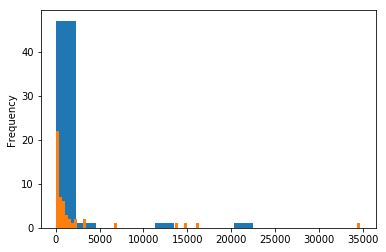

In [111]:
# insert code here
df['likes_count_fb'].plot(kind='hist')
df['reactions_count_fb'].plot(kind='hist',bins=100)
# bin or interval: depends on the max and min value and distribution of other values 

## 3. Conditional Expressions and Data Selection

Python comes with operators that help you to compare values. To understand how this works, run the cell below.

In [112]:
print('2 > 3 is ',2 > 3)
print('2 < 3 is ',2 < 3)
print('2 >= 3 is ',2 >= 3)
print('2 == 3 is ',2 == 3)
print('2 >= 2 is',2 >= 2)
print('2 == 2 is',2 == 2)

2 > 3 is  False
2 < 3 is  True
2 >= 3 is  False
2 == 3 is  False
2 >= 2 is True
2 == 2 is True


You might think "Duh, I knew that"... wait as second, and it will become clear why this type of operation is useful.

As you can guess, the `>` operator checks whether the value at the left-hand side is greater than the value at the right-hand side. `<` does the opposite.

`==` checks if two values are equal. 

> IMPORTANT: 

> `=` is only used for variable assignment (x =2); 

> `==` for checking if two values are equal (as in 2 == 4).

#### Exercise

Running the cell below we raise an error. Correct the code until it prints "Solved all errors!"

In [120]:
x = 2
y = 3
3 == 3
3 <= 4
x == y
print('Solved all errors!')

Solved all errors!


#### Exercise:

Oh, and just to be sure, check if 10 is still greater than 2.4?

In [123]:
# insert code here
10 > 2.4 

True

... And smaller than `10**2`

In [122]:
# insert code here

10 < 10**2

True

These comparisons return a [boolean values](https://en.wikipedia.org/wiki/Boolean_data_type) (i.e. `True` or `False`). 

We can apply the same operator to a whole row.

In [124]:
df['rea_LOVE'] > 100

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16     True
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30     True
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39     True
40    False
41    False
42     True
43    False
44    False
45    False
46    False
47    False
48    False
49    False
Name: rea_LOVE, dtype: bool

This returns a series of boolean values, which figures as a **mask**.
Below we select all rows for which the value in the rea_LOVE columns is greater than 100. Then, we use this mask to select rows that match the given conditional expression. Inspect the notation below carefully (especially the use of the square brackets)

In [125]:
df[df['rea_LOVE'] > 100]

,type,by,post_id,post_link,post_message,picture,full_picture,link,link_domain,post_published,...,comments_retrieved,comments_base,comments_replies,comment_likes_count,rea_LOVE,rea_WOW,rea_HAHA,rea_SAD,rea_ANGRY,rea_THANKFUL
16,link,post_page_5281959998,5281959998_10151785845154999,https://www.facebook.com/5281959998/posts/1015...,“His right to liberty is as valuable to him as...,https://external.xx.fbcdn.net/safe_image.php?d...,https://external.xx.fbcdn.net/safe_image.php?d...,https://www.nytimes.com/2018/12/27/nyregion/tr...,nytimes.com,2018-12-28T16:25:00+0000,...,283,72,211,673,258,12,15,0,10,0
30,link,post_page_5281959998,5281959998_10151785698544999,https://www.facebook.com/5281959998/posts/1015...,The Netflix show is releasing just one episode...,https://external.xx.fbcdn.net/safe_image.php?d...,https://external.xx.fbcdn.net/safe_image.php?d...,https://www.nytimes.com/2018/12/28/arts/televi...,nytimes.com,2018-12-28T09:26:13+0000,...,412,283,129,284,126,169,4,1,0,0
39,link,post_page_5281959998,5281959998_10151785229029999,https://www.facebook.com/5281959998/posts/1015...,In The New York Times Opinion Section Elizabe...,https://external.xx.fbcdn.net/safe_image.php?d...,https://external.xx.fbcdn.net/safe_image.php?d...,https://www.nytimes.com/2018/12/27/opinion/tru...,nytimes.com,2018-12-28T03:25:00+0000,...,2241,1044,1197,8875,1718,168,575,19,71,0
42,link,post_page_5281959998,5281959998_10151785342404999,https://www.facebook.com/5281959998/posts/1015...,A dad didn’t want his 25-year-old daughter to ...,https://external.xx.fbcdn.net/safe_image.php?d...,https://external.xx.fbcdn.net/safe_image.php?d...,https://www.nytimes.com/2018/12/27/us/dad-daug...,nytimes.com,2018-12-28T01:55:00+0000,...,1204,670,534,6456,11711,396,76,19,7,0


To know how many rows match this condition, simply apply the `.shape` attribute.

In [127]:
df[df['rea_LOVE'] > 100].shape

(4, 27)

To see the actual text use the `.loc` indexer.

In [126]:
df.loc[df['rea_LOVE'] > 100,'post_message']

16    “His right to liberty is as valuable to him as...
30    The Netflix show is releasing just one episode...
39    In The New York Times Opinion Section  Elizabe...
42    A dad didn’t want his 25-year-old daughter to ...
Name: post_message, dtype: object

#### Exercise

How many posts have more than 100 WOW reactions?


In [128]:
# insert code here 
df[df['rea_WOW'] > 100].shape 

(13, 27)

Print the text of these posts:

In [129]:
# insert code here
df.loc[df['rea_WOW'] > 100,'post_message']

10    Breaking News: The EPA proposed new rules for ...
12    North Carolina s elections board dissolved 2 w...
13    Wells Fargo will pay a $575 million settlement...
17    Syria’s most powerful Kurdish militia has call...
19    The European Union prohibits or severely restr...
21    In The New York Times Opinion Section  the Edi...
22    For a few minutes last night  it seemed as if ...
24    There was a boom; then a hum. The lights flick...
30    The Netflix show is releasing just one episode...
39    In The New York Times Opinion Section  Elizabe...
42    A dad didn’t want his 25-year-old daughter to ...
46    The Trump administration and Republicans in Co...
48    News analysis: With his abrupt order to withdr...
Name: post_message, dtype: object

Print the text *and* date of publication of these posts:

In [131]:
# insert code here
df.loc[df['rea_WOW'] > 100,['post_message','post_published']]

,post_message,post_published
10,Breaking News: The EPA proposed new rules for ...,2018-12-28T18:06:55+0000
12,North Carolina s elections board dissolved 2 w...,2018-12-28T17:40:00+0000
13,Wells Fargo will pay a $575 million settlement...,2018-12-28T17:25:00+0000
17,Syria’s most powerful Kurdish militia has call...,2018-12-28T15:55:00+0000
19,The European Union prohibits or severely restr...,2018-12-28T15:25:00+0000
21,In The New York Times Opinion Section the Edi...,2018-12-28T14:25:00+0000
22,For a few minutes last night it seemed as if ...,2018-12-28T13:55:00+0000
24,There was a boom; then a hum. The lights flick...,2018-12-28T12:55:00+0000
30,The Netflix show is releasing just one episode...,2018-12-28T09:26:13+0000
39,In The New York Times Opinion Section Elizabe...,2018-12-28T03:25:00+0000


#### Exercise

Select all posts that received more love than hate (measure in reactions)
> HINT: Create a mask that compares two columns directly

In [137]:
# insert code here
df.loc[df['rea_LOVE'] > df['rea_ANGRY'],['post_message'] ]


,post_message
0,Facebook keeps its rulebooks and their existen...
1,In 1972 Jerry Lewis best known for mainstrea...
2,The last issue of the New York Times Magazine ...
3,Trump s trip to Iraq was supposed to be a secr...
4,So why did an explosion turn New York City s n...
6,It feels like family. Across the United Stat...
11,The photos show how New York City has changed ...
14,From The New York Times Opinion Section
16,“His right to liberty is as valuable to him as...
18,Breaking News: Amos Oz an Israeli author who ...


## Sorting DataFrames

Lastly, we can sort the DataFrame by a specific column. De `.sort_values()` method takes two argument
- `by=`: the column you column you want use
- `ascending=` should be equal to `False` if you want to rank the table from high to low.

In [138]:
df.sort_values(by='rea_HAHA',ascending=False)

,type,by,post_id,post_link,post_message,picture,full_picture,link,link_domain,post_published,...,comments_retrieved,comments_base,comments_replies,comment_likes_count,rea_LOVE,rea_WOW,rea_HAHA,rea_SAD,rea_ANGRY,rea_THANKFUL
48,link,post_page_5281959998,5281959998_10151785251369999,https://www.facebook.com/5281959998/posts/1015...,News analysis: With his abrupt order to withdr...,https://external.xx.fbcdn.net/safe_image.php?d...,https://external.xx.fbcdn.net/safe_image.php?d...,https://www.nytimes.com/2018/12/27/us/politics...,nytimes.com,2018-12-27T23:25:00+0000,...,741,421,320,2077,31,167,826,22,65,0
39,link,post_page_5281959998,5281959998_10151785229029999,https://www.facebook.com/5281959998/posts/1015...,In The New York Times Opinion Section Elizabe...,https://external.xx.fbcdn.net/safe_image.php?d...,https://external.xx.fbcdn.net/safe_image.php?d...,https://www.nytimes.com/2018/12/27/opinion/tru...,nytimes.com,2018-12-28T03:25:00+0000,...,2241,1044,1197,8875,1718,168,575,19,71,0
3,link,post_page_5281959998,5281959998_10151785890624999,https://www.facebook.com/5281959998/posts/1015...,Trump s trip to Iraq was supposed to be a secr...,https://external.xx.fbcdn.net/safe_image.php?d...,https://external.xx.fbcdn.net/safe_image.php?d...,https://www.nytimes.com/2018/12/28/world/europ...,nytimes.com,2018-12-28T19:25:00+0000,...,137,59,78,457,7,74,321,4,4,0
49,link,post_page_5281959998,5281959998_10151785245419999,https://www.facebook.com/5281959998/posts/1015...,Republican leaders gave up hope on Thursday of...,https://external.xx.fbcdn.net/safe_image.php?d...,https://external.xx.fbcdn.net/safe_image.php?d...,https://www.nytimes.com/2018/12/27/us/politics...,nytimes.com,2018-12-27T22:55:00+0000,...,735,403,332,6327,30,88,226,88,625,0
43,link,post_page_5281959998,5281959998_10151785170899999,https://www.facebook.com/5281959998/posts/1015...,What happened with Trump s tax cut one year l...,https://external.xx.fbcdn.net/safe_image.php?d...,https://external.xx.fbcdn.net/safe_image.php?d...,https://www.nytimes.com/2018/12/27/us/politics...,nytimes.com,2018-12-28T01:25:00+0000,...,442,255,187,1912,4,68,173,98,746,0
24,link,post_page_5281959998,5281959998_10151785716319999,https://www.facebook.com/5281959998/posts/1015...,There was a boom; then a hum. The lights flick...,https://external.xx.fbcdn.net/safe_image.php?d...,https://external.xx.fbcdn.net/safe_image.php?d...,https://www.nytimes.com/2018/12/27/nyregion/bl...,nytimes.com,2018-12-28T12:55:00+0000,...,408,290,118,954,27,601,166,5,5,0
35,link,post_page_5281959998,5281959998_10151785189199999,https://www.facebook.com/5281959998/posts/1015...,Culture officials of Italy s nationalistic rig...,https://external.xx.fbcdn.net/safe_image.php?d...,https://external.xx.fbcdn.net/safe_image.php?d...,https://www.nytimes.com/2018/12/27/world/europ...,nytimes.com,2018-12-28T05:25:00+0000,...,239,91,148,672,10,27,124,21,77,0
26,link,post_page_5281959998,5281959998_10151785726864999,https://www.facebook.com/5281959998/posts/1015...,Italy’s under secretary accused France of tryi...,https://external.xx.fbcdn.net/safe_image.php?d...,https://external.xx.fbcdn.net/safe_image.php?d...,https://www.nytimes.com/2018/12/27/world/europ...,nytimes.com,2018-12-28T11:55:00+0000,...,195,72,123,538,2,21,118,16,41,0
42,link,post_page_5281959998,5281959998_10151785342404999,https://www.facebook.com/5281959998/posts/1015...,A dad didn’t want his 25-year-old daughter to ...,https://external.xx.fbcdn.net/safe_image.php?d...,https://external.xx.fbcdn.net/safe_image.php?d...,https://www.nytimes.com/2018/12/27/us/dad-daug...,nytimes.com,2018-12-28T01:55:00+0000,...,1204,670,534,6456,11711,396,76,19,7,0
10,link,post_page_5281959998,5281959998_10151785919684999,https://www.facebook.com/5281959998/posts/1015...,Breaking News: The EPA proposed new rules for ...,https://external.xx.fbcdn.net/safe_image.php?d...,https://external.xx.fbcdn.net/safe_image.php?d...,https://www.nytimes.com/2018/12/28/climate/mer...,nytimes.com,2018-

You can use this in combination with `head()` if you want to show only the first *n* rows

In [139]:
df.sort_values(by='rea_HAHA',ascending=False).head(10)

,type,by,post_id,post_link,post_message,picture,full_picture,link,link_domain,post_published,...,comments_retrieved,comments_base,comments_replies,comment_likes_count,rea_LOVE,rea_WOW,rea_HAHA,rea_SAD,rea_ANGRY,rea_THANKFUL
48,link,post_page_5281959998,5281959998_10151785251369999,https://www.facebook.com/5281959998/posts/1015...,News analysis: With his abrupt order to withdr...,https://external.xx.fbcdn.net/safe_image.php?d...,https://external.xx.fbcdn.net/safe_image.php?d...,https://www.nytimes.com/2018/12/27/us/politics...,nytimes.com,2018-12-27T23:25:00+0000,...,741,421,320,2077,31,167,826,22,65,0
39,link,post_page_5281959998,5281959998_10151785229029999,https://www.facebook.com/5281959998/posts/1015...,In The New York Times Opinion Section Elizabe...,https://external.xx.fbcdn.net/safe_image.php?d...,https://external.xx.fbcdn.net/safe_image.php?d...,https://www.nytimes.com/2018/12/27/opinion/tru...,nytimes.com,2018-12-28T03:25:00+0000,...,2241,1044,1197,8875,1718,168,575,19,71,0
3,link,post_page_5281959998,5281959998_10151785890624999,https://www.facebook.com/5281959998/posts/1015...,Trump s trip to Iraq was supposed to be a secr...,https://external.xx.fbcdn.net/safe_image.php?d...,https://external.xx.fbcdn.net/safe_image.php?d...,https://www.nytimes.com/2018/12/28/world/europ...,nytimes.com,2018-12-28T19:25:00+0000,...,137,59,78,457,7,74,321,4,4,0
49,link,post_page_5281959998,5281959998_10151785245419999,https://www.facebook.com/5281959998/posts/1015...,Republican leaders gave up hope on Thursday of...,https://external.xx.fbcdn.net/safe_image.php?d...,https://external.xx.fbcdn.net/safe_image.php?d...,https://www.nytimes.com/2018/12/27/us/politics...,nytimes.com,2018-12-27T22:55:00+0000,...,735,403,332,6327,30,88,226,88,625,0
43,link,post_page_5281959998,5281959998_10151785170899999,https://www.facebook.com/5281959998/posts/1015...,What happened with Trump s tax cut one year l...,https://external.xx.fbcdn.net/safe_image.php?d...,https://external.xx.fbcdn.net/safe_image.php?d...,https://www.nytimes.com/2018/12/27/us/politics...,nytimes.com,2018-12-28T01:25:00+0000,...,442,255,187,1912,4,68,173,98,746,0
24,link,post_page_5281959998,5281959998_10151785716319999,https://www.facebook.com/5281959998/posts/1015...,There was a boom; then a hum. The lights flick...,https://external.xx.fbcdn.net/safe_image.php?d...,https://external.xx.fbcdn.net/safe_image.php?d...,https://www.nytimes.com/2018/12/27/nyregion/bl...,nytimes.com,2018-12-28T12:55:00+0000,...,408,290,118,954,27,601,166,5,5,0
35,link,post_page_5281959998,5281959998_10151785189199999,https://www.facebook.com/5281959998/posts/1015...,Culture officials of Italy s nationalistic rig...,https://external.xx.fbcdn.net/safe_image.php?d...,https://external.xx.fbcdn.net/safe_image.php?d...,https://www.nytimes.com/2018/12/27/world/europ...,nytimes.com,2018-12-28T05:25:00+0000,...,239,91,148,672,10,27,124,21,77,0
26,link,post_page_5281959998,5281959998_10151785726864999,https://www.facebook.com/5281959998/posts/1015...,Italy’s under secretary accused France of tryi...,https://external.xx.fbcdn.net/safe_image.php?d...,https://external.xx.fbcdn.net/safe_image.php?d...,https://www.nytimes.com/2018/12/27/world/europ...,nytimes.com,2018-12-28T11:55:00+0000,...,195,72,123,538,2,21,118,16,41,0
42,link,post_page_5281959998,5281959998_10151785342404999,https://www.facebook.com/5281959998/posts/1015...,A dad didn’t want his 25-year-old daughter to ...,https://external.xx.fbcdn.net/safe_image.php?d...,https://external.xx.fbcdn.net/safe_image.php?d...,https://www.nytimes.com/2018/12/27/us/dad-daug...,nytimes.com,2018-12-28T01:55:00+0000,...,1204,670,534,6456,11711,396,76,19,7,0
10,link,post_page_5281959998,5281959998_10151785919684999,https://www.facebook.com/5281959998/posts/1015...,Breaking News: The EPA proposed new rules for ...,https://external.xx.fbcdn.net/safe_image.php?d...,https://external.xx.fbcdn.net/safe_image.php?d...,https://www.nytimes.com/2018/12/28/climate/mer...,nytimes.com,2018-

#### Exercise

Show the 10 rows with the most WOW reactions!

In [140]:
# insert code here
df.sort_values(by='rea_WOW',ascending=False).head(10)

,type,by,post_id,post_link,post_message,picture,full_picture,link,link_domain,post_published,...,comments_retrieved,comments_base,comments_replies,comment_likes_count,rea_LOVE,rea_WOW,rea_HAHA,rea_SAD,rea_ANGRY,rea_THANKFUL
19,link,post_page_5281959998,5281959998_10151785721564999,https://www.facebook.com/5281959998/posts/1015...,The European Union prohibits or severely restr...,https://external.xx.fbcdn.net/safe_image.php?d...,https://external.xx.fbcdn.net/safe_image.php?d...,https://www.nytimes.com/2018/12/28/well/eat/fo...,nytimes.com,2018-12-28T15:25:00+0000,...,923,497,426,5990,51,817,55,215,1017,0
24,link,post_page_5281959998,5281959998_10151785716319999,https://www.facebook.com/5281959998/posts/1015...,There was a boom; then a hum. The lights flick...,https://external.xx.fbcdn.net/safe_image.php?d...,https://external.xx.fbcdn.net/safe_image.php?d...,https://www.nytimes.com/2018/12/27/nyregion/bl...,nytimes.com,2018-12-28T12:55:00+0000,...,408,290,118,954,27,601,166,5,5,0
42,link,post_page_5281959998,5281959998_10151785342404999,https://www.facebook.com/5281959998/posts/1015...,A dad didn’t want his 25-year-old daughter to ...,https://external.xx.fbcdn.net/safe_image.php?d...,https://external.xx.fbcdn.net/safe_image.php?d...,https://www.nytimes.com/2018/12/27/us/dad-daug...,nytimes.com,2018-12-28T01:55:00+0000,...,1204,670,534,6456,11711,396,76,19,7,0
12,link,post_page_5281959998,5281959998_10151785894064999,https://www.facebook.com/5281959998/posts/1015...,North Carolina s elections board dissolved 2 w...,https://external.xx.fbcdn.net/safe_image.php?d...,https://external.xx.fbcdn.net/safe_image.php?d...,https://www.nytimes.com/2018/12/28/us/politics...,nytimes.com,2018-12-28T17:40:00+0000,...,166,118,48,844,2,368,28,25,663,0
10,link,post_page_5281959998,5281959998_10151785919684999,https://www.facebook.com/5281959998/posts/1015...,Breaking News: The EPA proposed new rules for ...,https://external.xx.fbcdn.net/safe_image.php?d...,https://external.xx.fbcdn.net/safe_image.php?d...,https://www.nytimes.com/2018/12/28/climate/mer...,nytimes.com,2018-12-28T18:06:55+0000,...,1390,1208,182,4040,26,350,63,1089,13465,0
22,link,post_page_5281959998,5281959998_10151785740844999,https://www.facebook.com/5281959998/posts/1015...,For a few minutes last night it seemed as if ...,https://external.xx.fbcdn.net/safe_image.php?d...,https://external.xx.fbcdn.net/safe_image.php?d...,https://www.nytimes.com/2018/12/28/nyregion/ne...,nytimes.com,2018-12-28T13:55:00+0000,...,206,137,69,715,14,276,60,0,0,0
46,link,post_page_5281959998,5281959998_10151785015314999,https://www.facebook.com/5281959998/posts/1015...,The Trump administration and Republicans in Co...,https://external.xx.fbcdn.net/safe_image.php?d...,https://external.xx.fbcdn.net/safe_image.php?d...,https://www.nytimes.com/interactive/2017/10/05...,nytimes.com,2018-12-28T00:25:00+0000,...,791,554,237,3697,30,211,14,2020,10011,0
30,link,post_page_5281959998,5281959998_10151785698544999,https://www.facebook.com/5281959998/posts/1015...,The Netflix show is releasing just one episode...,https://external.xx.fbcdn.net/safe_image.php?d...,https://external.xx.fbcdn.net/safe_image.php?d...,https://www.nytimes.com/2018/12/28/arts/televi...,nytimes.com,2018-12-28T09:26:13+0000,...,412,283,129,284,126,169,4,1,0,0
39,link,post_page_5281959998,5281959998_10151785229029999,https://www.facebook.com/5281959998/posts/1015...,In The New York Times Opinion Section Elizabe...,https://external.xx.fbcdn.net/safe_image.php?d...,https://external.xx.fbcdn.net/safe_image.php?d...,https://www.nytimes.com/2018/12/27/opinion/tru...,nytimes.com,2018-12-28T03:25:00+0000,...,2241,1044,1197,8875,1718,168,575,19,71,0
48,link,post_page_5281959998,5281959998_10151785251369999,https://www.facebook.com/5281959998/posts/1015...,News analysis: With his abrupt order to withdr...,https://external.xx.fbcdn.net/safe_image.php?d...,https://external.xx.fbcdn.net/safe_image.php?d...,https://www.nytimes.com/2018/12/27/us/politics...,n

## WOW, that's all for today!